# 데이터 전처리


- 데이터를 분석에 사용할 때 성능이 더 좋게 나오도록 데이터를 수정하거나 형태를 변형하는 작업
- data preprocessing

<img src="https://raw.githubusercontent.com/data-labs/image/main/%E1%84%89%E1%85%B3%E1%84%8F%E1%85%B3%E1%84%85%E1%85%B5%E1%86%AB%E1%84%89%E1%85%A3%E1%86%BA%202021-01-07%20%E1%84%8B%E1%85%A9%E1%84%92%E1%85%AE%204.33.49.png?raw=1" width=500  align='left'>  



## 데이터 전처리 종류

- 데이터 클리닝 - 결측치 처리, 틀린값 처리
- 이상치 처리 - 이상치 탐지 및 제거
- 데이터 변환 - 로그 변환, 카테고리 인코딩 등
- 스케일링 - 여러 변수 값의 범위를 동등한 조건으로 맞추는 것: 표준 스케일링, min-max 스케일링

# 한글 설치

## 코랩에 한글 폰트 설치
- (주의!) 아래 셀을 실행 후에, 런타임 - 런타임 다시 시작을 수행해야 한다
 - 코랩은 리눅스 머신이면 한글이 미리 설치되어 있지 않다
 - 한글이 이미 설치된 PC에서는 아래 셀을 실행할 필요없다

In [1]:
# colab을 사용하는 경우만 이 셀을 실행하며, 실행 후 런타임 - 런타임 다시 시작 을 수행해야 한다
# 한글이 설치된 PC에서는 이 셀을 실행할 필요 없음

import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
 
!apt -qq -y install fonts-nanum
fe = fm.FontEntry(
    fname=r'/usr/share/fonts/truetype/nanum/NanumGothic.ttf', # ttf 파일이 저장되어 있는 경로
    name='NanumGothic')                        # 이 폰트의 원하는 이름 설정
fm.fontManager.ttflist.insert(0, fe)              # Matplotlib에 폰트 추가
plt.rcParams.update({'font.size': 18, 'font.family': 'NanumGothic'}) # 폰트 설정

The following NEW packages will be installed:
  fonts-nanum
0 upgraded, 1 newly installed, 0 to remove and 38 not upgraded.
Need to get 9,599 kB of archives.
After this operation, 29.6 MB of additional disk space will be used.
Selecting previously unselected package fonts-nanum.
(Reading database ... 122541 files and directories currently installed.)
Preparing to unpack .../fonts-nanum_20180306-3_all.deb ...
Unpacking fonts-nanum (20180306-3) ...
Setting up fonts-nanum (20180306-3) ...
Processing triggers for fontconfig (2.13.1-2ubuntu3) ...


## 한글 사용 설정
- 그림에 한글이 보이게 하기 위해서 한글 사용을 설정한다.
- 운영체제마다 명령이 다르다

In [2]:
import platform, matplotlib
from matplotlib import rc

# '-' 기호 제대로 보이기
matplotlib.rcParams['axes.unicode_minus'] = False

# 윈도우
if platform.system() == 'Windows':
    rc('font', family="Malgun Gothic")
# 맥
elif platform.system() == 'Darwin':
    rc('font', family='AppleGothic')
# 리눅스
elif platform.system() == 'Linux':
    rc('font', family='NanumGothic')

# 데이터
- 키와 몸무게 데이터 생성
- 평균 170cm, 65kg, 표준편차 4cm, 5kg

## import

In [3]:
import numpy as np
import pandas as pd
#import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

%config InlineBackend.figure_format = 'retina'
matplotlib.rcParams['figure.figsize'] = (6,4)
matplotlib.rcParams.update({'font.size': 13})

## 데이터 생성
- 임의의 키, 몸무게 데이터 생성

In [4]:
## 100명의 키(170,4), 몸무게(65,5) 데이터 생성 

N = 100
height = 4*np.random.randn(N).round(2) + 170
weight = 5*np.random.randn(N).round(2) + 65
df = pd.DataFrame({"height": height, "weight": weight})
df[:5]

,height,weight
0,164.56,61.75
1,173.84,71.95
2,172.12,60.70
3,168.96,59.00
4,181.40,73.65


In [5]:
## 임의로 결측치 삽입

df['height'][2] = np.nan
df['weight'][3] = np.nan
df[:5]

,height,weight
0,164.56,61.75
1,173.84,71.95
2,NaN,60.70
3,168.96,NaN
4,181.40,73.65


# 데이터 클리닝

##  결측치 처리
- 값이 비어 있는 것을 처리하는 것 (파이썬에서는 빈 값이 nan으로 표시된다: not a number)
- 결측치를 처리하는 방법은 크게 세 가지가 있다
 - 결측치가 포함된 샘플(행)을 버린다
 - 결측치를 적절한 값으로 대체한다
 - 결측치 처리를 다음 분석 단계로 넘긴다. 즉, 결측치를 그대로 둔다
 
##  틀린값 처리
- 틀린값을 처리하는 방법도 결측치를 처리하는 방법과 같이 세가지이다
 - 틀린 값이 포함된 샘플(행)을 버린다
 - 틀린 값을 적절한 값으로 대체한다
 - 틀린값 처리를 다음 분석 단계로 넘긴다. 즉, 틀린값을 그대로 둔다

## 결측치 처리 실습

- 결측치 확인은 np.isnull() 사용
- 결측치 치환은 np.fillna() 사용

In [6]:
## 컬럼별 결측치 총 개수 보기

df.isnull().sum()

height    1
weight    1
dtype: int64

### 결측치가 있는 행 삭제

In [7]:
## 결측치가 하나라도 있는 행(샘플) 삭제하기

df2 = df.dropna()
print(df2.shape)
df2[:5]

(98, 2)


,height,weight
0,164.56,61.75
1,173.84,71.95
4,181.40,73.65
5,177.00,66.55
6,175.64,65.65


### 결측치 대체

In [8]:
## 결측치 대체하기 (키는 170으로 몸무게는 평균치로 대체)

df3 = df.copy()
df3['height'].fillna(170, inplace=True)
df3['weight'].fillna(df3['weight'].mean(), inplace=True)
print(df3.shape)
df3[:5]

(100, 2)


,height,weight
0,164.56,61.750000
1,173.84,71.950000
2,170.00,60.700000
3,168.96,65.260101
4,181.40,73.650000


In [9]:
## 결측치를 바로 이전 값으로 대체하는 경우 (forward fill)

df.fillna(method="bfill")[:5]

,height,weight
0,164.56,61.75
1,173.84,71.95
2,168.96,60.70
3,168.96,73.65
4,181.40,73.65


In [10]:
df = df3.copy()
df[:5]

,height,weight
0,164.56,61.750000
1,173.84,71.950000
2,170.00,60.700000
3,168.96,65.260101
4,181.40,73.650000


# 이상치 처리
- 이상치 처리의 목적은 두가지 이다
 - 1) 이상치를 제거하여 데이터 분석의 정확도를 높이려는 경우
 - 2) 이상치를 찾는 것 자체가 목적인 경우 (outlier detection)  
 
- 아래는 모두 같은 상관계수를 같는 데이터 셋이다

<img src="https://raw.githubusercontent.com/data-labs/image/main/%E1%84%89%E1%85%B3%E1%84%8F%E1%85%B3%E1%84%85%E1%85%B5%E1%86%AB%E1%84%89%E1%85%A3%E1%86%BA%202021-01-03%20%E1%84%8B%E1%85%A9%E1%84%92%E1%85%AE%201.47.02.png?raw=1" width=400 align='left'>

## 이상치 탐지
 - boxplot()을 보면 이상치 존재를 파악하기 쉽다
 - 표준 스케일링 한 후 값이 큰 것들 (예 6 이상)을 찾는 방법이 일반적이다

# 데이터 변환

- 카테고리 인코딩
- 원 핫 인코딩
- 로그변환
- 역수변환

# 카테고리 인코딩

In [11]:
## 카테고리 인코딩을 위한 데이터 생성 (국적 컬럼을 추가)

human = df3[['height','weight']][:5]
human['nation'] = ['한국', '중국', '일본', '한국', '일본']
human

,height,weight,nation
0,164.56,61.750000,한국
1,173.84,71.950000,중국
2,170.00,60.700000,일본
3,168.96,65.260101,한국
4,181.40,73.650000,일본


In [12]:
## humna 에서 nation 컬럼을 원핫 인코딩하는 방법

pd.get_dummies(human, ['nation'])

,height,weight,nation_일본,nation_중국,nation_한국
0,164.56,61.750000,0,0,1
1,173.84,71.950000,0,1,0
2,170.00,60.700000,1,0,0
3,168.96,65.260101,0,0,1
4,181.40,73.650000,1,0,0


## 로그 변환

- 어떤 변수는 로그를 취해야 입출력 관계에서 선형적인 변화(효과)를 표현하는 경우가 있다
- 예: 돈, 생물학적 자극과 반응 관계 (청각, 미각, 후각, 압력 등)
- 데이터 분석에서는 입출력 관계가 선형적일 때 가장 잘 예측할 수 있다 (선형적일수록 예측이 잘 된다)

Text(0, 0.5, '느끼는 소리 크기')

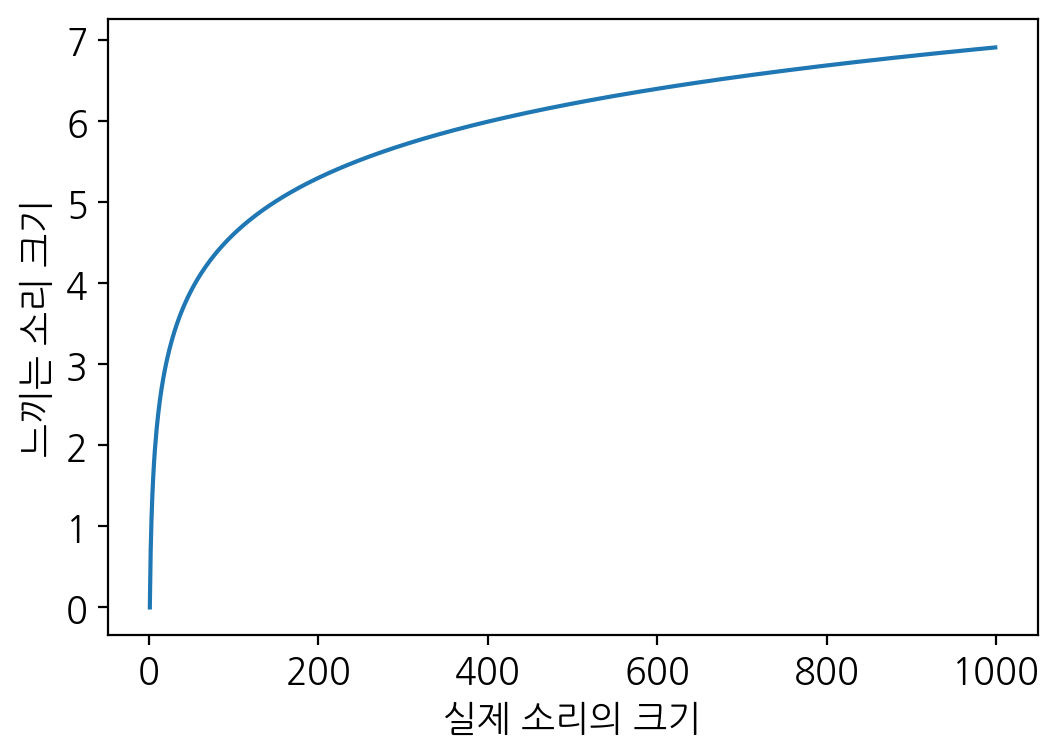

In [13]:
# 돈의 수입과 만족도의 관계는 대체로 로그 함수를 따른다 (생물학적 반응)
# (해석) 로그 함수의 기울기는 1/x 이다. 즉 만족도 증가는 현재 가진 돈의 크기에 반비례한다
# 소리의 변화와 느끼는 감각의 변화 
x = np.arange(1,1000)
plt.plot(x,np.log(x))
plt.xlabel('실제 소리의 크기')
plt.ylabel('느끼는 소리 크기')

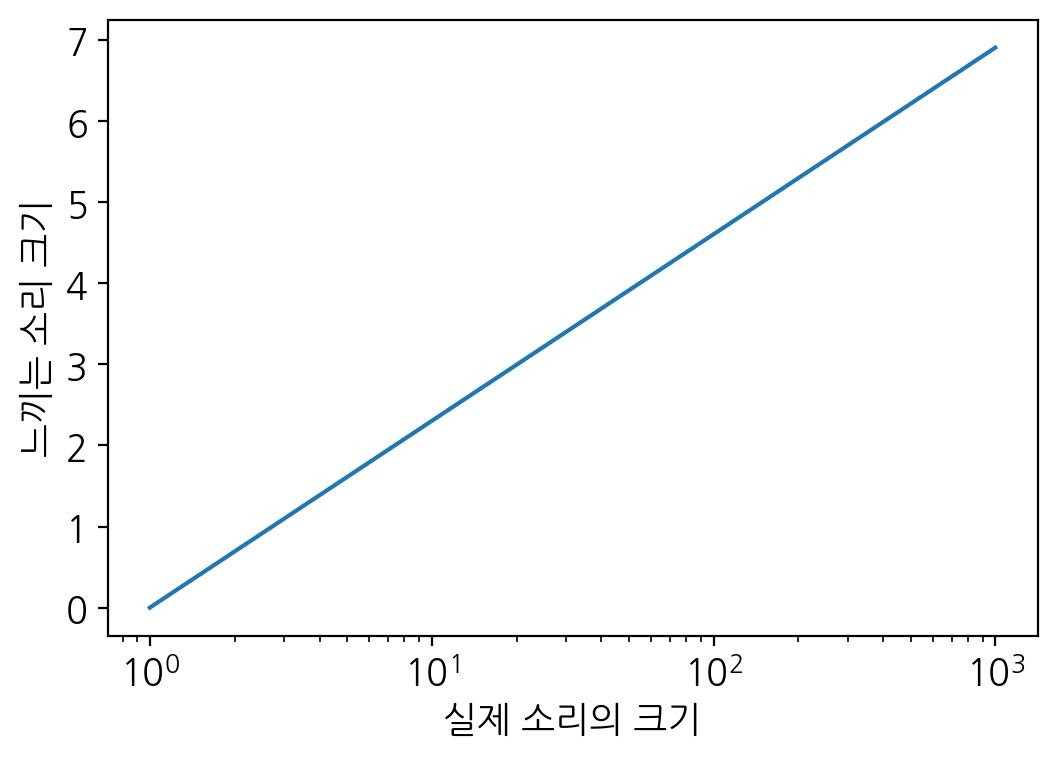

In [14]:
# x 축을 로그 스케일로 그리면 (로그를 취하면) 입출력 관계가 선형적이 된다
x = np.arange(1,1000)
plt.plot(x,np.log(x))
plt.xscale("log")
plt.xlabel('실제 소리의 크기')
plt.ylabel('느끼는 소리 크기')
plt.show()

### log-normal 분포

- 어떤 값에 로그를 취하면 정규분포를 갖는 특성의 데이터 (예: 국가별 수출액 분포)

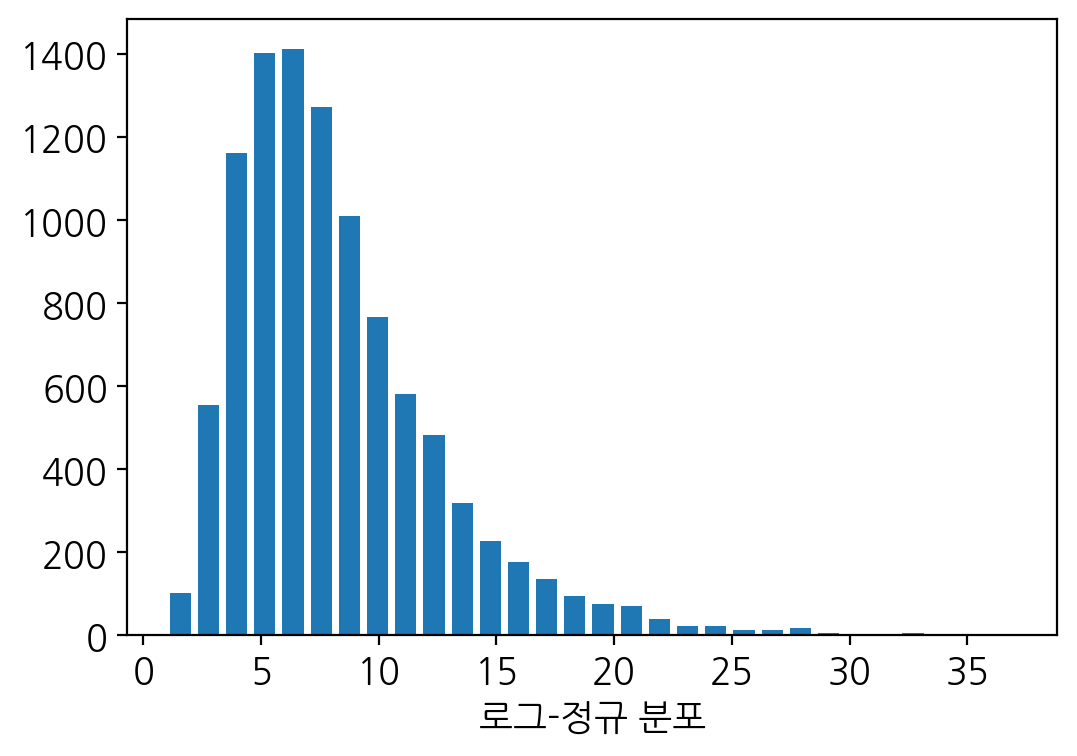

In [15]:
x = np.random.lognormal(2,0.5,10000)
plt.hist(x, bins=30, width=0.9)
plt.xlabel('로그-정규 분포')
plt.show()

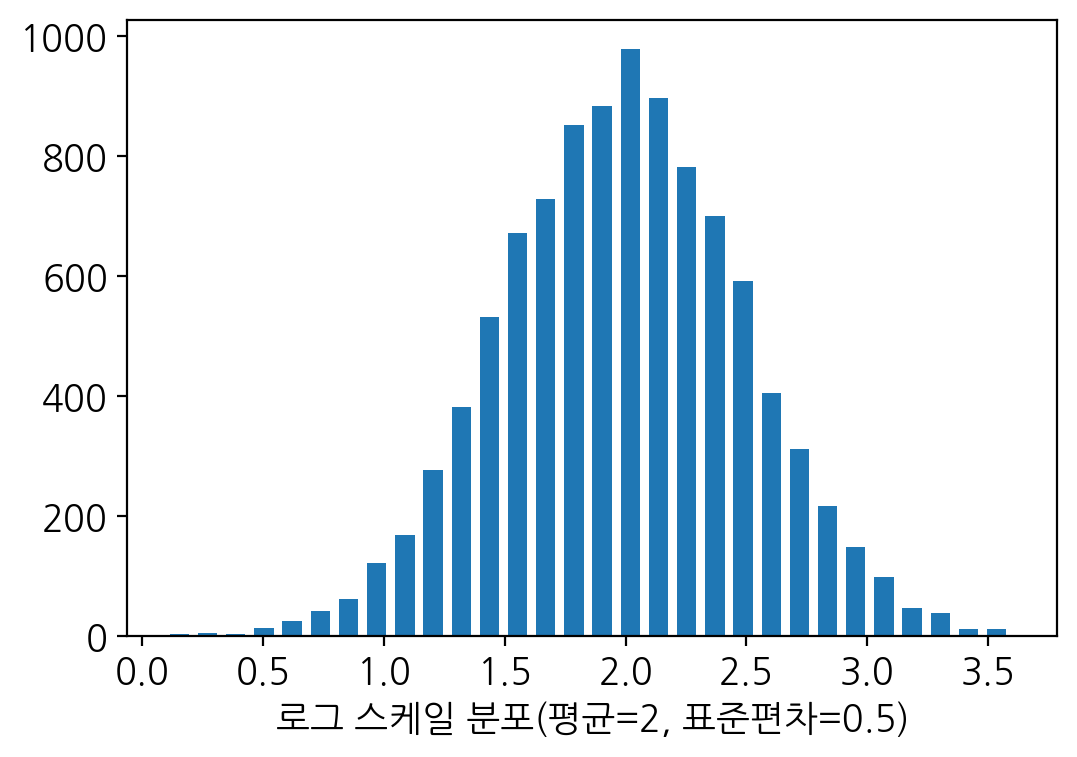

In [16]:
plt.hist(np.log(x), bins=30, width=0.08)
plt.xlabel('로그 스케일 분포(평균=2, 표준편차=0.5)')
plt.show()

# 스케일링
- 여러 변수 값의 범위가 서로 다른 경우 데이터 분석에서 동일한 비중으로 반영하기 위해서는 동일한 범위를 갖도록 변환해야 한다 (예: 과목 성적 100점 만점으로 환산)
- 표준 스케일링을 가장 많이 사용한다 (평균이 0, 표준편차가 1이 되도록 변환)
- 값의 최소치와 최대치가 정해진 경우는 min-max 스케링일도 자주 사용된다 (최소치를 0으로, 최대치를 1로)

## 표준 스케일링


<img src="https://raw.githubusercontent.com/data-labs/image/main/%E1%84%89%E1%85%B3%E1%84%8F%E1%85%B3%E1%84%85%E1%85%B5%E1%86%AB%E1%84%89%E1%85%A3%E1%86%BA%202021-01-05%20%E1%84%8B%E1%85%A9%E1%84%92%E1%85%AE%208.52.14.png?raw=1" width=140  align='left'>

In [17]:
## 키, 몸무게 데이터를 최소-최대 및 표준 스케일링한 결과 보기

from sklearn.preprocessing import StandardScaler, MinMaxScaler
scaler = StandardScaler()
minmax = MinMaxScaler()

df3[['h_sc','w_sc']]=scaler.fit_transform(df3[['height','weight']])
df3[['h_mima','w_mima']]=minmax.fit_transform(df3[['height','weight']])
df3[:5]

,height,weight,h_sc,w_sc,h_mima,w_mima
0,164.56,61.750000,-1.303274,-0.705561,0.164683,0.376648
1,173.84,71.950000,0.951963,1.344728,0.625000,0.760829
2,170.00,60.700000,0.018761,-0.916620,0.434524,0.337100
3,168.96,65.260101,-0.233981,0.000000,0.382937,0.508855
4,181.40,73.650000,2.789203,1.686443,1.000000,0.824859


In [18]:
print(scaler.mean_, scaler.scale_)

[169.9228      65.26010101] [4.1148677  4.97490693]


- 스케일링 이전의 원래 값으로 환원하는 방법
- inverse_transform을 사용한다

In [19]:
## 스케일링 이전의 값으로 환원하기

scaler.inverse_transform(df3[["h_sc","w_sc"]])[:5]

array([[164.56      ,  61.75      ],
       [173.84      ,  71.95      ],
       [170.        ,  60.7       ],
       [168.96      ,  65.26010101],
       [181.4       ,  73.65      ]])

## (중요) fit_transform()과 transform()을 구분

- 최초에 훈련데이터로 스케일링을 할때는 fit_transform()를 사용한다
- 향후 테스트 데이터등 새로운 데이터를 스케일링할 때는 fit_transform()를 다시 수행하면 안되고, 앞에서 만든 scaler 객체가 제공하는 scaler.transform()을 호출해야 한다
 - 앞에서 만든 스케일링 조건(평균, 표준편차, 최대값, 최소값 등)과 동일한 방식으로 스케일링을 해야 하므로
 - fit_transform()를 다시 수행하면 스케일링 조건(평균, 표준편차, 최대값, 최소값 등)을 다시 계산한다